In [9]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
    
sns.set_style('darkgrid')
np.random.seed(seed=13)

In [161]:
x = np.random.uniform(0, 1, 20)

def f(x):
    return x*2

noise_variance = 0.2
noise = np.random.randn(x.shape[0]) * noise_variance
t = f(x) + noise

20

<IPython.core.display.Javascript object>


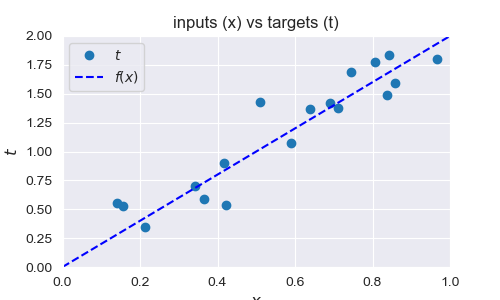

In [29]:
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (t)')
plt.legend(loc=2)
plt.show()

In [30]:
def nn(x, w):
    return x*w

def loss(y,t):
    return np.mean((t-y)**2)

In [180]:
ws = np.linspace(0, 4, num=100)
loss_ws = np.vectorize(lambda w: loss(nn(x,w), t))(ws)

array([1.62617482, 1.56269852, 1.50050483, 1.43959375, 1.37996528,
       1.32161942, 1.26455616, 1.20877551, 1.15427747, 1.10106204,
       1.04912921, 0.99847899, 0.94911138, 0.90102638, 0.85422399,
       0.8087042 , 0.76446702, 0.72151245, 0.67984049, 0.63945114,
       0.60034439, 0.56252025, 0.52597872, 0.4907198 , 0.45674348,
       0.42404977, 0.39263867, 0.36251018, 0.3336643 , 0.30610102,
       0.27982035, 0.25482229, 0.23110684, 0.20867399, 0.18752376,
       0.16765613, 0.1490711 , 0.13176869, 0.11574889, 0.10101169,
       0.0875571 , 0.07538512, 0.06449574, 0.05488897, 0.04656482,
       0.03952326, 0.03376432, 0.02928799, 0.02609426, 0.02418314,
       0.02355463, 0.02420872, 0.02614543, 0.02936474, 0.03386666,
       0.03965119, 0.04671832, 0.05506806, 0.06470042, 0.07561537,
       0.08781294, 0.10129312, 0.1160559 , 0.13210129, 0.14942929,
       0.16803989, 0.18793311, 0.20910893, 0.23156736, 0.25530839,
       0.28033204, 0.30663829, 0.33422715, 0.36309862, 0.39325

In [203]:
def gradient(w, x, t):
    return 2*x*(nn(x,w) - t)

def delta_w(w_k, x, t, learning_rate):
    return learning_rate * np.mean(gradient(w_k, x, t))

w = np.random.rand()
learning_rate = 0.9

nb_of_iterations = 4
w_loss = [(w, loss(nn(x,w), t))]

for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)
    w -= dw
    w_loss.append((w, loss(nn(x, w), t)))
    
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')    

w(0): 0.1764 	 loss: 1.3585
w(1): 1.4799 	 loss: 0.1381
w(2): 1.8617 	 loss: 0.0334
w(3): 1.9735 	 loss: 0.0244
w(4): 2.0062 	 loss: 0.0236


<IPython.core.display.Javascript object>


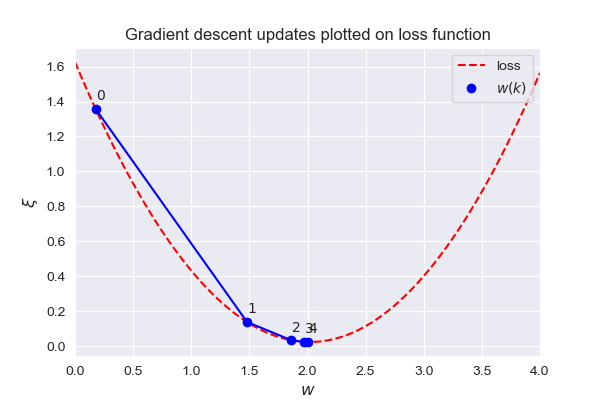

In [204]:
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')  # Loss curve
# Plot the updates
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')
# Show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()